In [21]:
import numpy as np
import pandas as pd
import pyreadstat as pr
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [22]:
arc = "./data/compensacion-ejecutivos.sav"
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [23]:
y = df["salario"]
X = df.drop(["salario", "noasiat", "postgrad"], axis = 1)
X

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [24]:
reg_lin = sm.OLS(y, sm.add_constant(X)).fit() # Ordinary list square
reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           7.37e-38
Time:                        19:40:03   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
gpa         2.024e+04   1364.423     14.831      0.000    1.75e+04    2.29e+04
experien    1973.1918    148.539     13.284      0.000    1678.730    2267.653
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.857
Skew:                          -0.191   Prob(JB):                        0.651
Kurtosis:                       2.795   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           7.37e-38
Time:                        19:40:03   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

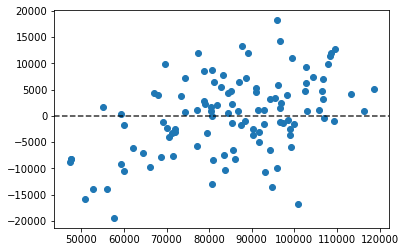

In [26]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y - y_pred)
plt.axhline(y=0, color="black",alpha=0.8,linestyle="--")

In [27]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [28]:
df["salario"].describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [29]:
df.describe()

,salario,noasiat,gpa,postgrad,experien
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,85256.518182,0.509091,3.001455,0.645455,9.909091
std,16419.359283,0.502205,0.524191,0.480565,4.815010
min,47279.000000,0.000000,1.860000,0.000000,1.000000
25%,74379.000000,0.000000,2.650000,0.000000,6.000000
50%,86384.000000,1.000000,2.935000,1.000000,10.000000
75%,96827.250000,1.000000,3.367500,1.000000,14.000000
max,118683.000000,1.000000,4.000000,1.000000,20.000000


In [30]:
y = np.where(df["salario"]> 96000, 1,0)
X = df.drop(["salario"], axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

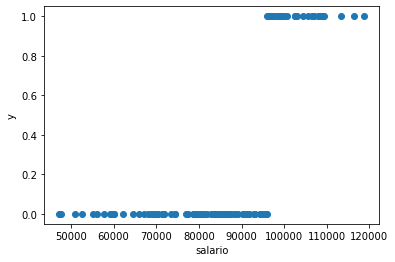

In [31]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel("salario")
ax.set_ylabel("y")


In [36]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X,y)
y_estimado_1 = reg_log.predict(X)

In [39]:
metrics.accuracy_score(y, reg_log.predict(X))

0.9090909090909091